In [132]:
### Load parsed TRAJ gene data

import pandas as pd

df = pd.read_csv("../TRAJ_homology/TRAJ_list.txt", sep = "\n")
gene_names = df["HUGO"].values.tolist()

df = pd.read_csv("../TRAJ_homology/TRAJ_UCSC.tsv", sep = "\t")
gene_IDs = df["#name"].values.tolist()


In [2]:
### Load GTF file data

f = open("genes.gtf", "r")
gtf = f.readlines()
result_list = []

for g in gtf:
    ID_idx = g.find("transcript_id")
    ID_start = ID_idx + g[ID_idx:].find("\"")+1
    ID_end = ID_start + g[ID_start:].find("\"")
    ID = g[ID_start:ID_end]
    start = int(g.split()[3])
    end = int(g.split()[4])
    result_list.append([ID, start, end])

In [3]:
### Parse positions of TRAJ genes
### Return a list of lists containing exon positions

pos = [[] for i in range(len(gene_IDs))]
for i in range(len(result_list)):
    for j in range(len(gene_IDs)):
        if result_list[i][0] == gene_IDs[j]:
            pos[j].append((result_list[i][1], result_list[i][2]))

In [4]:
gene_positions = []
positions = df[["exonStarts", "exonEnds"]].values.tolist()
for i in range(len(gene_names)):
    exon_count = len(positions[i][0].split(","))-1
    for j in range(exon_count):
        start = int(positions[i][0].split(",")[j])
        end = int(positions[i][1].split(",")[j])
        gene_positions.append((start,end,i))

In [5]:
for i in range(5):
    print(gene_positions[i])
print("...")
for i in range(5,0,-1):
    print(gene_positions[len(gene_positions)-i])

(22475315, 22475375, 0)
(22476305, 22476362, 1)
(22476552, 22476606, 2)
(22477706, 22477769, 3)
(22478871, 22478934, 4)
...
(22540246, 22540306, 55)
(22542198, 22542261, 56)
(22543178, 22543240, 57)
(22544070, 22544136, 58)
(22545036, 22545098, 59)


## TRAV Read Count Analysis

In [6]:
f = open("aln_TRA.bed", "r")
lines = f.readlines()
f.close()
read_positions = []
scores = []
CROM = 18200001 # position of the start of chromosome 14.

for l in lines:
    chrom_start = int(l.split()[1])
    chrom_end = int(l.split()[2])
    score = int(l.split()[4])
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    scores.append(score)
read_positions.sort(reverse = True, key = lambda x : x[2])

In [7]:
ALN_RATE = 0.2
read_count = [0]*len(gene_names)

for i in range(len(read_positions)):
    for j in range(len(gene_positions)):
        read_start = read_positions[i][0]
        read_end = read_positions[i][1]
        gene_start = gene_positions[j][0]
        gene_end = gene_positions[j][1]
        
        if (read_start >= gene_start and read_start <= gene_end) or (read_end >= gene_start and read_end <= gene_end):
            overlap = min(read_end, gene_end)-max(read_start, gene_start)
            if overlap >= (gene_end-gene_start)*ALN_RATE:
                read_count[gene_positions[j][2]] += 1

<BarContainer object of 60 artists>

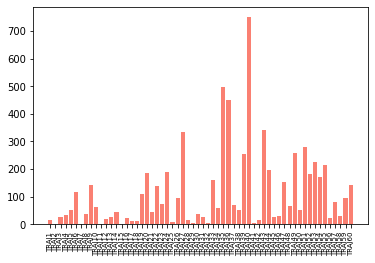

In [8]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90, fontsize = 7)
plt.bar(gene_names, read_count, color="salmon")

## Recalibration

In [20]:
f = open("aln_TRA.bed", "r")
lines = f.readlines()
f.close()
read_positions = []
scores = []
CROM = 18200001 # position of the start of chromosome 14.

for l in lines:
    chrom_start = int(l.split()[1])
    chrom_end = int(l.split()[2])
    score = int(l.split()[4])
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    read_positions.append((chrom_start+CROM, chrom_end+CROM, score))
    scores.append(score)

In [21]:
f = open("hg38_Twist_ILMN_Exome_2.0_Plus_Panel_annotated_chr14.bed", "r")
bed14 = f.readlines()
f.close()
targets = []
for b in bed14:
    if "TRAJ" in b.split("\t")[3]:
        if "TRAJ" in b.split("\t")[3].split(",")[0]:
            targets.append((int(b.split("\t")[1]),int(b.split("\t")[2]),b.split("\t")[3].split(",")[0]))
        else:
            targets.append((int(b.split("\t")[1]),int(b.split("\t")[2]),b.split("\t")[3].split(",")[1]))


In [22]:
for i in range(5):
    print(targets[i])
print("...")
for i in range(5,0,-1):
    print(targets[len(targets)-i])

(22475315, 22475375, 'TRAJ61')
(22476552, 22476606, 'TRAJ59')
(22477706, 22477769, 'TRAJ58')
(22478871, 22478934, 'TRAJ57')
(22479520, 22479582, 'TRAJ56')
...
(22540246, 22540306, 'TRAJ5')
(22542198, 22542261, 'TRAJ4')
(22543178, 22543240, 'TRAJ3')
(22544070, 22544136, 'TRAJ2')
(22545036, 22545098, 'TRAJ1')


In [23]:
temp = [targets[i][2] for i in range(len(targets))]
targeted_gene_names = list(dict.fromkeys(temp))
untargeted_gene_indexes = []

print("targeted genes:")
for i in range(5):
    print(targeted_gene_names[i])
print("...")
for i in range(5,0,-1):
    print(targeted_gene_names[len(targeted_gene_names)-i])

print("\nuntargeted genes:")
for i in range(len(gene_names)):
    if gene_names[i] not in targeted_gene_names:
        if i not in untargeted_gene_indexes:
            untargeted_gene_indexes.append(i)
        print(gene_names[i])


targeted genes:
TRAJ61
TRAJ59
TRAJ58
TRAJ57
TRAJ56
...
TRAJ5
TRAJ4
TRAJ3
TRAJ2
TRAJ1

untargeted genes:
TRAJ8
TRAJ15
TRAJ51
TRAJ55
TRAJ60


In [24]:
ALN_RATE = 0.2
read_count = [0]*len(gene_names)

for i in range(len(read_positions)):
    for j in range(len(gene_positions)):
        read_start = read_positions[i][0]
        read_end = read_positions[i][1]
        gene_start = gene_positions[j][0]
        gene_end = gene_positions[j][1]
        
        if (read_start >= gene_start and read_start <= gene_end) or (read_end >= gene_start and read_end <= gene_end):
            overlap = min(read_end, gene_end)-max(read_start, gene_start)
            if overlap >= (gene_end-gene_start)*ALN_RATE:
                read_count[gene_positions[j][2]] += 1

In [25]:
f = open("aln_TRA.bed", "r")
tra_bed = f.readlines()
positions = []
CROM_START = 18200001

for tra in tra_bed:
    chrom_start = int(tra.split()[1])
    chrom_end = int(tra.split()[2])
    positions.append((chrom_start+CROM_START, chrom_end+CROM_START))

In [26]:
read_count_dict = {}
for target in targets:
    if target[2] not in read_count_dict:
        read_count_dict[target[2]] = 0

In [27]:
for position in positions:
    for target in targets:
        if (position[1] > target[0] and position[0] < target[0]) or (position[1] > target[1] and position[0] < target[1]):
            read_count_dict[target[2]] += 1
            break

In [28]:
count_list = list(read_count_dict.values())
targeted_gene_names.reverse()

<BarContainer object of 56 artists>

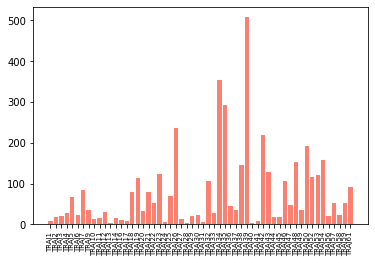

In [29]:
import matplotlib.pyplot as plt
names = list(read_count_dict.keys())
plt.xticks(rotation=90, fontsize = 7)
plt.bar(targeted_gene_names, count_list, color="salmon")
